<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
ID            30000 non-null int64
LIMIT_BAL     30000 non-null int64
SEX           30000 non-null int64
EDUCATION     30000 non-null int64
MARRIAGE      30000 non-null int64
AGE           30000 non-null int64
PAY_0         30000 non-null int64
PAY_2         30000 non-null int64
PAY_3         30000 non-null int64
PAY_4         30000 non-null int64
PAY_5         30000 non-null int64
PAY_6         30000 non-null int64
BILL_AMT1     30000 non-null int64
BILL_AMT2     30000 non-null int64
BILL_AMT3     30000 non-null int64
BILL_AMT4     30000 non-null int64
BILL_AMT5     30000 non-null int64
BILL_AMT6     30000 non-null int64
PAY_AMT1      30000 non-null int64
PAY_AMT2      30000 non-null int64
PAY_AMT3      30000 non-null int64
PAY_AMT4      30000 non-null int64
PAY_AMT5      30000 non-null int64
PAY_AMT6      30000 non-null int64
DEFAULT_NM    30000 non-null int64
dtypes: int64(25

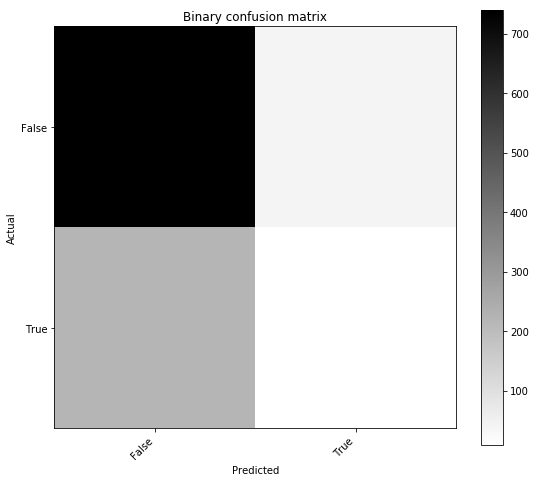

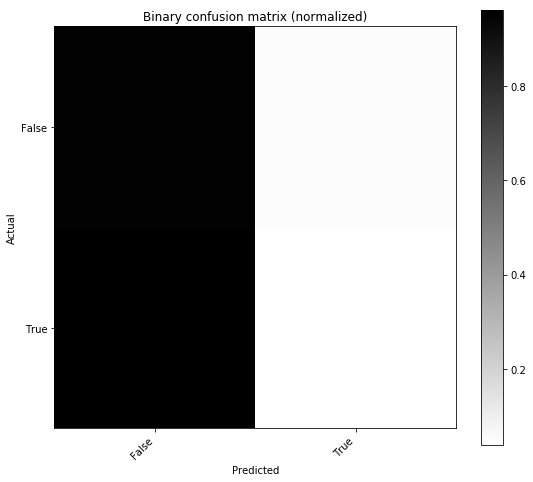

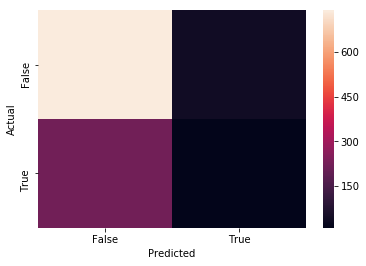

Accuracy Score 0.7782272894446488
Classification Report               precision    recall  f1-score   support

          0       0.80      0.96      0.87      4288
          1       0.39      0.08      0.14      1150

avg / total       0.71      0.78      0.72      5438



In [8]:

####################################
####################################
#Course 5 Task 4 - Credit One Project NN
####################################
####################################


#import numpy, pandas, scipy, matplotlib etc.
import pandas as pd
import matplotlib.pyplot as plt
import scipy
from math import sqrt
import numpy as np
from pandas import Series, DataFrame
import matplotlib as mpl
import seaborn as sns 
import random 
from pandas_ml import ConfusionMatrix
import seaborn as sns 

# Set seed
np.random.seed()

#import estimators
from sklearn.ensemble import RandomForestClassifier
#from sklearn.svm import SVR
from sklearn.neighbors import NearestNeighbors
from sklearn.neighbors import KNeighborsClassifier
from sklearn import linear_model
from sklearn import svm
from sklearn import tree
from sklearn.ensemble import ExtraTreesClassifier

#Model metrics
from sklearn.metrics import confusion_matrix
from pandas_ml import ConfusionMatrix


#Cross validation
from sklearn.cross_validation import cross_val_score

# Import data
path='C:\\Users\\amare\\Documents\\U Texas Austin Data Science\\Course 52\\CC_Default.csv'
df = pd.read_csv(path,header = 1)

# Rename default payment next month column to DEFAULT_NM
df.rename(columns={'default payment next month': 'DEFAULT_NM'}, inplace=True)
df.head()

#Examine structure of data
df.info()


#features -  select features
#features = df.iloc[:,[0,11,12,13,14,15,16,17,18,19,20,21,22,23,24]]
#features = df.iloc[:,0:24]
#features = df.iloc[:,[0,11,12,13,14,15,16,17,18,19,20,21,22,23,24]]
features = df.iloc[:,[0,1,5,6,7,12,13,14,15,16,17,18,19,20]]

print('Summary of feature sample')
features.head()

#dependent variable
depVar = df['DEFAULT_NM']

#Establish the training set for the X-variables or Feature space (70:30)
#Training Set (Feature Space: X Training)
X_train = (features[:-1000])
X_train.head()

#Establish the training set for the Y-variable or dependent variable 
#Dependent Variable Training Set (y Training)
y_train = depVar[:-1000]
y_train_count = len(y_train.index)
print('The number of observations in the Y training set are:',str(y_train_count))
y_train.head()

#Testing Set (X Testing). Establish the testing set for the X-Variables or Feature space.
X_test = features[-100:]
X_test_count = len(X_test.index)
print('The number of observations in the feature testing set is:',str(X_test_count))
print(X_test.head())

#Ground Truth (y_test). Establish Ground truth  
y_test = depVar[:-100]
y_test_count = len(y_test.index)
print('The number of observations in the Y training set are:',str(y_test_count))
y_test.head()

# Crossvalidation
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train)
X_train.shape, X_test.shape
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train)
X_train.shape, X_test.shape

#scikit learn format
model = KNeighborsClassifier()


####Building model and chosing the right model

#Establish variables that we will use for defining each model.
#Models
#modelNN = NearestNeighbors()
modelNN = KNeighborsClassifier(n_neighbors=10, algorithm='auto')
#modelNN = KNeighborsClassifier(n_neighbors=20, algorithm='auto')

#validate that the correct column is being used for the dependent variable:#dependent variable
print(depVar)

# Use the model variables established above. Pass the training data. 
model.fit(X_train,y_train)

#Nearest Neighbor classification
modelNN.fit(X_train,y_train)

#Nearest Neighbor classification Model Fitting and Scoring
modelNN.fit(X_train,y_train)
print("NN", (cross_val_score(modelNN, X_train, y_train))) 
modelNN.score(X_train,y_train)

#Make Predictions - NN
predictions = modelNN.predict(X_test)
#cm=confusion_matrix(y_test, predictions)
#print("Confusion matrix NN:\n%s" % cm)

#Evaluate the results
binary_confusion_matrix = ConfusionMatrix(y_test, predictions)
print("Binary confusion matrix NN:\n%s" % binary_confusion_matrix)
print(binary_confusion_matrix.TP)
binary_confusion_matrix.plot()
plt.show()
binary_confusion_matrix.plot(normalized=True)
plt.show()
binary_confusion_matrix.plot(backend='seaborn')
plt.show()

#Accuracy
from sklearn.metrics import accuracy_score
print("Accuracy Score",accuracy_score(y_test, predictions))
#Classification Report
from sklearn.metrics import classification_report
print("Classification Report ",(classification_report(y_test, predictions)))
